# Polynomial Regression and Overfitting (Discussion Activity)

## Goal

This discussion activity will help prepare you for your computational homework,
where you will compare ordinary least squares, Ridge regression, Lasso, and
subset selection methods.

Today we will:

1. Generate noisy data from the function:
   $$
   f(x) = \sin(2\pi x)
   $$
   where $x \sim \text{Uniform}(-1,1)$

2. Build a polynomial design matrix of degree \( m \)

3. Fit an ordinary least squares (OLS) regression model

4. Examine:
   - The fitted curve
   - The residuals

You should begin asking yourself:

- What happens as the polynomial degree increases?
- What do the residuals look like?
- Are they random? Structured?
- What might this imply about model misspecification or overfitting?

Residual plots matter. Look at them.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

# for reproducibility and the answer to life/the universe & everything
np.random.seed(42)  

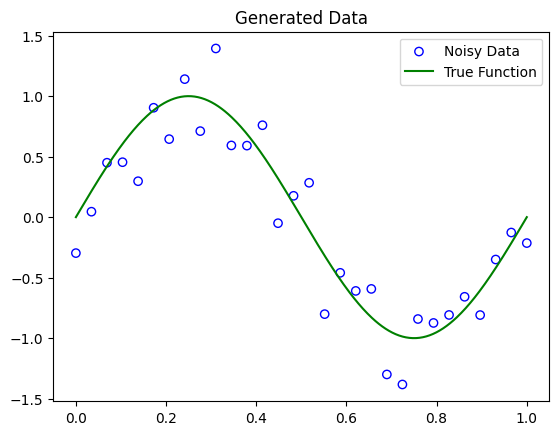

Design matrix shape: (30, 2)


In [20]:
# ----------------------------
# Parameters
# ----------------------------
n = 30           # number of data points
m = 1            # polynomial degree
sigma = 0.3      # noise level

# ----------------------------
# Generate Data (Equally spaced in [0,1])
# ----------------------------
x = np.linspace(0, 1, n)

true_function = lambda x: np.sin(2 * np.pi * x)
y_true = true_function(x)
y = y_true + np.random.normal(0, sigma, n)

# ----------------------------
# Build Design Matrix
# ----------------------------
# Vandermonde matrix with powers 0 through m
X = np.vander(x, N=m+1, increasing=True)

# ----------------------------
# Plot Data vs True Function
# ----------------------------
x_dense = np.linspace(0, 1, 400)

plt.figure()
plt.scatter(
    x, y,
    facecolors='none',   # open circles
    edgecolors='blue',
    label="Noisy Data"
)

plt.plot(
    x_dense,
    true_function(x_dense),
    color='green',
    label="True Function"
)

plt.title("Generated Data")
plt.legend()
plt.show()

print("Design matrix shape:", X.shape)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     20.92
Date:                Fri, 13 Feb 2026   Prob (F-statistic):           8.89e-05
Time:                        10:00:41   Log-Likelihood:                -24.238
No. Observations:                  30   AIC:                             52.48
Df Residuals:                      28   BIC:                             55.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7281      0.200      3.638      0.0

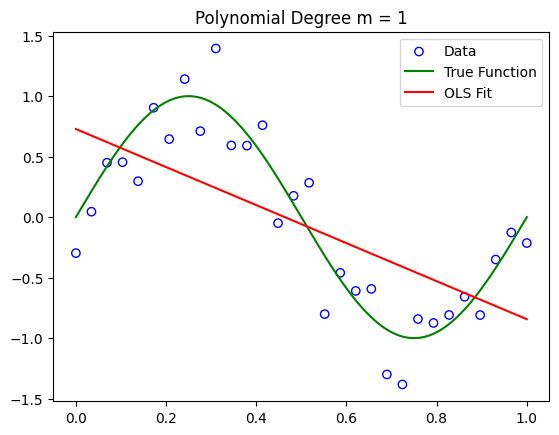

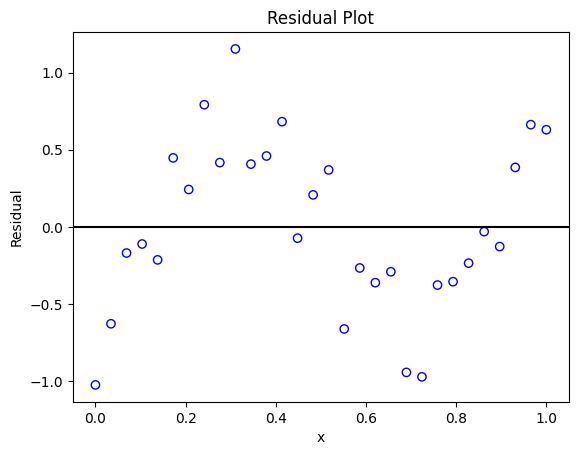

In [21]:
# ----------------------------
# Fit OLS
# ----------------------------
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

# ----------------------------
# Predictions
# ----------------------------
X_dense = np.vander(x_dense, N=m+1, increasing=True)
y_pred_dense = results.predict(X_dense)

y_pred = results.predict(X)
residuals = y - y_pred

# ----------------------------
# Plot 1: Fitted Curve (Bishop-style)
# ----------------------------
plt.figure()

plt.scatter(
    x, y,
    facecolors='none',
    edgecolors='blue',
    label="Data"
)

plt.plot(
    x_dense,
    true_function(x_dense),
    color='green',
    label="True Function"
)

plt.plot(
    x_dense,
    y_pred_dense,
    color='red',
    label="OLS Fit"
)

plt.title(f"Polynomial Degree m = {m}")
plt.legend()
plt.show()

# ----------------------------
# Plot 2: Residuals (Catnip)
# ----------------------------
plt.figure()
plt.scatter(
    x,
    residuals,
    facecolors='none',
    edgecolors='blue'
)

plt.axhline(0, color='black')
plt.title("Residual Plot")
plt.xlabel("x")
plt.ylabel("Residual")
plt.show()


<Figure size 640x480 with 0 Axes>

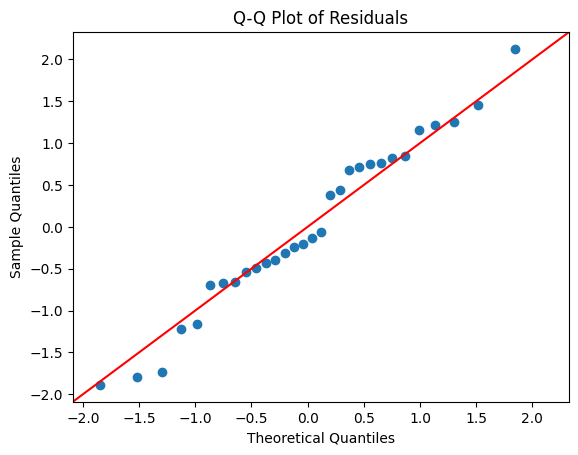

In [22]:
plt.figure()
sm.qqplot(residuals, line='45', fit=True)
plt.title("Q-Q Plot of Residuals")
plt.show()